# 개인형 이동장치 견인현황 시각화

In [ ]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [ ]:
tow = pd.read_csv('./data/서울특별시_전동킥보드_견인_현황_20220731 (2).csv', 
                    engine='python', encoding='cp949', error_bad_lines=False)
tow

C:\Users\sspc\AppData\Local\Temp\ipykernel_46892\1043788755.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tow = pd.read_csv('./data/서울특별시_전동킥보드_견인_현황_20220731 (2).csv',


,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,동작구,서울특별시 동작구 상도동 215-45,"점자블록, 엘리베이터 입구",2021-07-15
1,2,2021-07-15,동작구,서울특별시 동작구 상도동 172-28,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 대방동 356-2,"버스정류장, 택시 승강장",2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 대방동 354-1,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
60600,60601,2022-07-29,동작구,서울특별시 동작구 사당동 708-1025,보도와 차도가 구분된 도로의 차도,2022-07-29
60601,60602,2022-07-29,관악구,서울특별시 관악구 봉천동 1693-55,보도와 차도가 구분된 도로의 차도,2022-07-29
60602,60603,2022-07-29,동작구,서울특별시 동작구 사당동 175-56,보도와 차도가 구분된 도로의 차도,2022-07-29
60603,60604,2022-07-29,동작구,서울특별시 동작구 사당동 175-26,보도와 차도가 구분된 도로의 차도,2022-07-29


In [ ]:
tow.유형.unique()

array(['점자블록, 엘리베이터 입구', '보도 중앙', '버스정류장, 택시 승강장', '보도와 차도가 구분된 도로의 차도',
       '기타', '횡단보도, 산책로 등', '건물, 상가 보행자 진출입', '소방시설 5m 이내 구역',
       '육교위, 지하보차도 안', '자전거 도로', '지하철역 진출입로 및 주변', '오신고', '턱을 낮춘 진출입로',
       nan, '통행제한 구간', '계단, 난간'], dtype=object)

In [ ]:
tow.replace('보도와 차도가 구분된 도로의 차도','보행자와 차량이 분리된 차도 및 자전거도로', inplace=True)
tow.replace('자전거 도로','보행자와 차량이 분리된 차도 및 자전거도로', inplace=True)
tow.replace('지하철역 진출입로 및 주변','지하철역 출구 전면 5M', inplace=True)
tow.replace('버스정류장, 택시 승강장','버스정류소 전면 5M', inplace=True)
tow.replace('점자블록, 엘리베이터 입구','점자블럭 및 교통섬 위', inplace=True)
tow.replace('횡단보도, 산책로 등','횡단보도 전후 3M', inplace=True)
tow.replace('건물, 상가 보행자 진출입','그 외 주차 금지 구역', inplace=True)
tow.replace('계단, 난간','그 외 주차 금지 구역', inplace=True)
tow.replace('기타','그 외 주차 금지 구역', inplace=True)
tow.replace('보도 중앙','그 외 주차 금지 구역', inplace=True)
tow.replace('육교위, 지하보차도 안','그 외 주차 금지 구역', inplace=True)
tow.replace('소방시설 5m 이내 구역','그 외 주차 금지 구역', inplace=True)
tow.replace('턱을 낮춘 진출입로','그 외 주차 금지 구역', inplace=True)
tow.replace('통행제한 구간','그 외 주차 금지 구역', inplace=True)

In [ ]:
tow.유형.isnull().sum()
# tow[tow.유형.isnull()]

1

In [ ]:
tow = tow.dropna(axis=0)

In [ ]:
tow = tow[(tow['유형'] != '오신고')]
tow.유형.unique()

array(['점자블럭 및 교통섬 위', '그 외 주차 금지 구역', '버스정류소 전면 5M',
       '보행자와 차량이 분리된 차도 및 자전거도로', '횡단보도 전후 3M', '지하철역 출구 전면 5M'],
      dtype=object)

In [ ]:
# from pandas.core.frame import AggFuncType

# tow_table = pd.pivot_table(tow, 
#                          values='유형',
#                          aggfunc={'유형':'count'})
# area_table

In [ ]:
tow = tow[['번호','유형']]
tow

,번호,유형
0,1,점자블럭 및 교통섬 위
1,2,그 외 주차 금지 구역
2,3,버스정류소 전면 5M
3,4,버스정류소 전면 5M
4,5,보행자와 차량이 분리된 차도 및 자전거도로
...,...,...
60600,60601,보행자와 차량이 분리된 차도 및 자전거도로
60601,60602,보행자와 차량이 분리된 차도 및 자전거도로
60602,60603,보행자와 차량이 분리된 차도 및 자전거도로
60603,60604,보행자와 차량이 분리된 차도 및 자전거도로


In [ ]:
tow.유형.value_counts()

보행자와 차량이 분리된 차도 및 자전거도로    30326
횡단보도 전후 3M                  9819
버스정류소 전면 5M                 8198
점자블럭 및 교통섬 위                4496
그 외 주차 금지 구역                4135
지하철역 출구 전면 5M               3582
Name: 유형, dtype: int64

In [ ]:
tow1 = pd.pivot_table(tow, values='번호', index=['유형'],
                    aggfunc={'유형':'count'})
tow1

,유형
유형,
그 외 주차 금지 구역,4135
버스정류소 전면 5M,8198
보행자와 차량이 분리된 차도 및 자전거도로,30326
점자블럭 및 교통섬 위,4496
지하철역 출구 전면 5M,3582
횡단보도 전후 3M,9819


# 개인형이동장치 견인 구역 시각화

In [ ]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

<AxesSubplot:xlabel='유형'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '그 외 주차 금지 구역'),
  Text(1, 0, '버스정류소 전면 5M'),
  Text(2, 0, '보행자와 차량이 분리된 차도 및 자전거도로'),
  Text(3, 0, '점자블럭 및 교통섬 위'),
  Text(4, 0, '지하철역 출구 전면 5M'),
  Text(5, 0, '횡단보도 전후 3M')])

Text(0.5, 1.0, ' 견인 구역에 따른 개인형 이동장치 견인 건수')

Text(0.5, 0, '견인 구역 유형')

Text(0, 0.5, '견인건수')

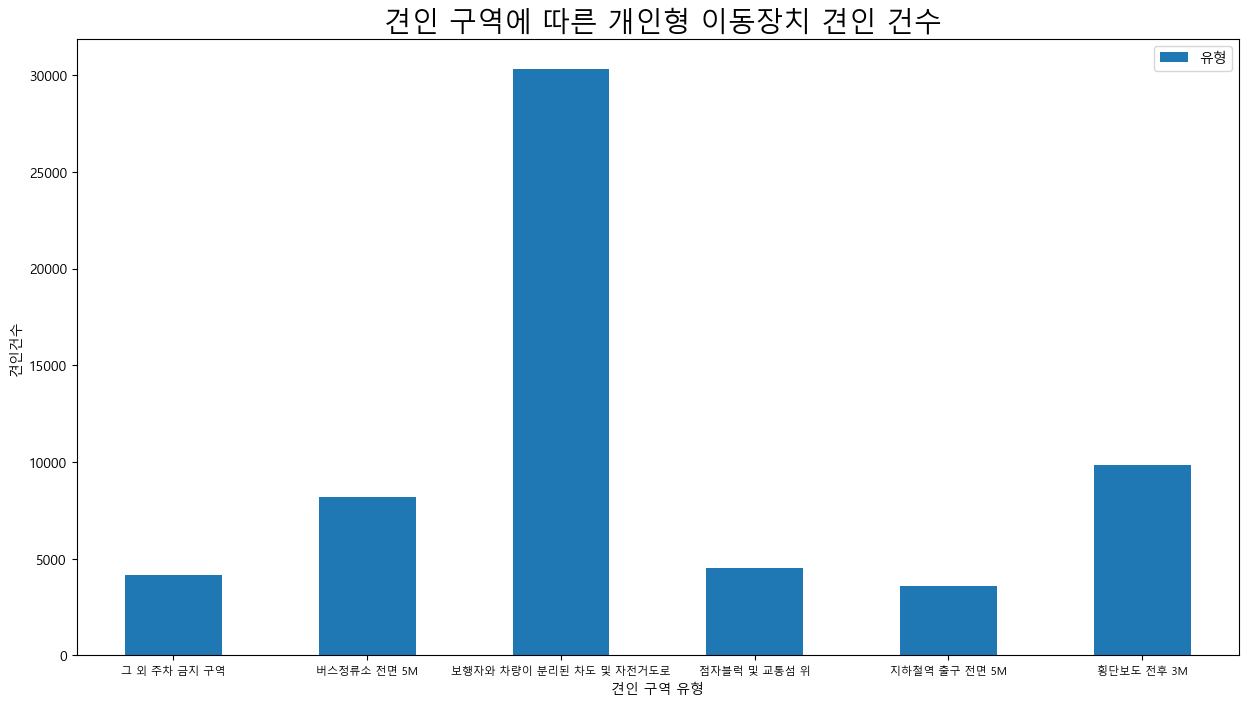

In [ ]:
tow1.plot.bar(figsize=(15,8))
plt.xticks(rotation=0, fontsize=8)

plt.title(' 견인 구역에 따른 개인형 이동장치 견인 건수', fontsize=20)

plt.xlabel('견인 구역 유형', fontsize=10)

plt.ylabel('견인건수', fontsize=10)